# 30 Day Map Challenge 

**Autor:** Mónica Gómez-Vadillo  
**GitHub:** [@mgomezzv26](https://github.com/mgomezzv26)  
**Fecha:** 3 noviembre 2025  

---

> **Challenge of the day:** *"Day 3: Polygons"*  
> Challenge Classic: Create a map focused on area features (e.g., administrative regions, land use, boundaries). Use fills, patterns, and choropleth techniques. 

---


# Libraries 

In [ ]:
# Libraries 
import geopandas as gpd
import rioxarray
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 1. Modern global style (without downloading fonts)

In [ ]:
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Gill Sans MT"],
    "font.size": 11,
    "axes.titleweight": "bold",
    "axes.labelcolor": "white",
    "axes.titlesize": 16,
    "axes.labelsize": 11,
    "figure.facecolor": "black",  
    "axes.facecolor": "black",  
})

# 2. Load data

In [18]:

raster_path = r"C:\Users\molic\Desktop\2025_30DayMapChallenge\03_Polygons\WorldClim\BIO1_mean_annual_temp.tif"
provinces_path = r"C:\Users\molic\Desktop\2025_30DayMapChallenge\03_Polygons\spain_provinces_IGN.gpkg"

# Provinces in WGS84
provinces = gpd.read_file(provinces_path).to_crs("EPSG:4326")

# Raster with assigned CRS
raster = rioxarray.open_rasterio(raster_path, masked=True)
raster = raster.rio.write_crs("EPSG:4326", inplace=True)


# 3. Cut back and redesign 

In [ ]:
raster_clipped = raster.rio.clip(provinces.geometry, provinces.crs, drop=True)
raster_merc = raster_clipped.rio.reproject("EPSG:3857")
provinces_merc = provinces.to_crs("EPSG:3857")

# 4. “Night Map” style display

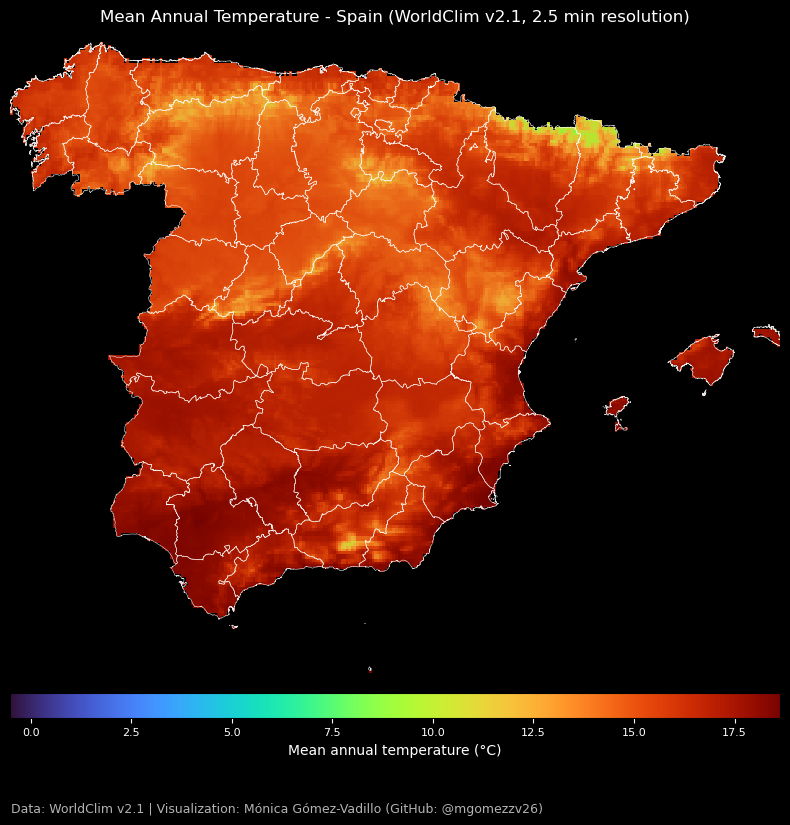

In [ ]:
fig, ax = plt.subplots(figsize=(8, 9), facecolor="black")

raster_merc.plot(
    ax=ax,
    cmap="turbo", 
    alpha=0.95,
    add_colorbar=False
)

# Provinces outlined in white
provinces_merc.boundary.plot(ax=ax, color="white", linewidth=0.4, alpha=0.9)

# No axles
ax.set_axis_off()

# Main title
ax.set_title(
    "Mean Annual Temperature - Spain (WorldClim v2.1, 2.5 min resolution)",
    color="white", pad=15
)

# Colour bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="4%", pad=0.2)

norm = mpl.colors.Normalize(vmin=raster_merc.min(), vmax=raster_merc.max())
cb = mpl.colorbar.ColorbarBase(cax, cmap="turbo", norm=norm, orientation="horizontal")
cb.set_label("Mean annual temperature (°C)", color="white", fontsize=10)
cb.ax.xaxis.set_tick_params(color="white")
plt.setp(plt.getp(cb.ax.axes, 'xticklabels'), color='white', fontsize=8)

# Figure caption 
fig.text(
    0.02, 0.02,
    "Data: WorldClim v2.1 | Visualization: Mónica Gómez-Vadillo (GitHub: @mgomezzv26)",
    color="white", fontsize=9, ha="left", alpha=0.7
)

# Final adjustments and export 
plt.tight_layout()

plt.savefig("Mean_Annual_Temperature_Spain.png", dpi=300, facecolor=fig.get_facecolor())
plt.show()